## Introduction
_____________________________________________
##### Dans le cadre d'un appel à projet de l'agence "Santé Publique France", nous sommes chargés de proposer une idée innovante d'application en lien avec l'alimentation

##### Jeu de données: Open Food Fact

- [Traiter le jeu de données afin de repérer des variables pertinentes](#1) :
- [Produire des visualisations (analyse univariée pour chaque variable intéressante](#2) :
- [Confirmer ou infirmer hypothèses avec analyse multivariée. Effectuer tests statistiques appropriés](#3) :
- Élaborer une idée d’application

### Analyse Exploratoire 
##### Analyse de forme:

- **Variable Target:** Nutrigrade
- **Ligne - Colonnes:** 1981823, 186
- **Types de Variables:** qualitatives: 60, quantitatives: 126
- **Valeurs manquantes:** Beaucoup de Nan (64% variables ont plus de 90% de NaN).
- **Valeurs aberrantes:** Suppression de 161 529 lignes aberrantes (Valeurs pour 100g > 100 ainsi que quantité sucres > quantité glucides et quantité gras saturé > quantité de gras).
- **Lignes redondantes:** Suppression de 202 061 lignes redondantes

##### Analyse de fond:

- **Visualisation Target:** Répartition en 5 groupes: 'a' et 'b' autour de 25k produits, 'c' et 'd' autour de 40k et 'e' à 60k.
- **Signification des variables:** Aucune des variables ne suit une loi normale. Elles presentent toutes une répartition de leurs valeurs Q1-Q3 entre 0-20g, autour d'une moyenne proche (sauf cas des Glucides plus "étalés"). L'Energie suit une répartition proche de celle des Glucides.
- **Relation variables/target:** Lien entre Nutri grade et Energie, Gras et Glucides.
- **Relation variable/variable:** Corrélations entre Graisse et Energie, Matières grasses et Acides gras saturés, Sucres et Glucides, et enfin Energie et Glucides

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## <a id =1 style='color:Green'> Exploration </a>
<span style='color:Green'> _____ </span>

### Visualisation - Drop colonnes inutiles

In [3]:
df = pd.read_csv(r"C:\Users\Damien\Desktop\Data Scientist\P3\Dataset\en.openfoodfacts.org.products.csv", sep='\t', error_bad_lines=False, low_memory=False)

In [4]:
df.shape

(1981823, 186)

In [5]:
pd.set_option('display.max_columns', 186)
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,ecoscore_score_fr,ecoscore_grade_fr,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,jeunes pousses,NaN,NaN,NaN,NaN,NaN,NaN,endives,endives,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:france,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [6]:
df.dtypes.value_counts()

float64    124
object      60
int64        2
dtype: int64

In [7]:
(df.isna().mean()).sort_values(ascending=True)

code                         0.0
states_en                    0.0
states                       0.0
last_modified_datetime       0.0
last_modified_t              0.0
                            ... 
ingredients_from_palm_oil    1.0
additives                    1.0
no_nutriments                1.0
allergens_en                 1.0
cities                       1.0
Length: 186, dtype: float64

In [8]:
(df.isna().mean()>0.90).value_counts(normalize=True)

True     0.639785
False    0.360215
dtype: float64

In [9]:
cols = df.columns[0:7]
cols

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime'],
      dtype='object')

In [10]:
df_prod = df.drop(cols, axis=1)

In [11]:
df_prod = df_prod.set_index('product_name')
df_prod.head()

,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,ecoscore_score_fr,ecoscore_grade_fr,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
product_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
jeunes pousses,NaN,NaN,NaN,NaN,NaN,NaN,endives,endives,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:france,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

### Filtre Taux Nan < 90%

In [12]:
cols2 = df_prod.isna().mean()<0.90
index_= cols2[cols2==True].index

In [13]:
df_filtre = df_prod[index_]
df_filtre.head()

,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,labels,labels_tags,labels_en,stores,countries,countries_tags,countries_en,ingredients_text,serving_size,serving_quantity,additives_n,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,ecoscore_score_fr,ecoscore_grade_fr,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
product_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
jeunes pousses,NaN,NaN,NaN,endives,endives,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:france,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
L.casei,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spain,en:spain,Spain,"Leche semidesnatada, azucar 6.9% leche desnata...",NaN,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,NaN,NaN,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,NaN,NaN,1.4,0.90,NaN,NaN,9.8,9.8,NaN,2.7,0.1,0.04,NaN,NaN,NaN,NaN,NaN
Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,NaN,NaN,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,NaN,NaN,375.0,1569.0,7.0,3.08,NaN,NaN,70.1,15.0,NaN,7.8,1.4,0.56,NaN,NaN,NaN,NaN,NaN
Cacao,130 g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,NaN,NaN,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Filetes de pollo empanado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Espagne,en:spain,Spain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,NaN,NaN,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,NaN,NaN,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,163.9,685.8,1.9,1.00,NaN,NaN,NaN,NaN,NaN,15.3,1.1,0.44,NaN,NaN,NaN,NaN,NaN


### Visualisation variables qualitatives interessantes

In [14]:
df_filtre.pnns_groups_2.value_counts()
# On garde pour pouvoir filtrer eventuellement par type de produits

unknown                             1225679
Sweets                                70671
Biscuits and cakes                    64676
Dressings and sauces                  50746
Cheese                                46552
One-dish meals                        43525
Cereals                               41025
Processed meat                        40508
Milk and yogurt                       33124
Meat                                  32530
Vegetables                            31889
Fish and seafood                      28455
Sweetened beverages                   23571
Bread                                 22931
Fats                                  22440
Alcoholic beverages                   17980
Fruits                                17710
Chocolate products                    14824
Salty and fatty products              14592
Unsweetened beverages                 12123
Appetizers                            11876
Fruit juices                           9935
Breakfast cereals               

In [15]:
df_filtre.pnns_groups_1.value_counts()
# Meme que pnns_groups_2 en moins détaillé => Supprimer

unknown                    1225679
Sugary snacks               156592
Fish Meat Eggs              106580
Milk and dairy products      94154
Cereals and potatoes         86287
Fat and sauces               73186
Beverages                    71272
Fruits and vegetables        58778
Composite foods              56520
Salty snacks                 34686
Alcoholic beverages          17978
sugary-snacks                    2
Name: pnns_groups_1, dtype: int64

In [16]:
df_filtre.ingredients_from_palm_oil_n.value_counts()
# A garder => Evaluer l'impact sur le nutrigrade

0.0    707078
1.0     14261
2.0       195
3.0         1
Name: ingredients_from_palm_oil_n, dtype: int64

In [17]:
df_filtre.categories.value_counts()
# Inutile => Supprimer

Snacks                                                                                                             32703
Snacks, Sweet snacks, Confectioneries                                                                              14279
Groceries, Sauces                                                                                                  13851
Dairies, Fermented foods, Fermented milk products, Cheeses                                                         11406
Snacks, Sweet snacks, Biscuits and cakes, Biscuits                                                                 10102
                                                                                                                   ...  
tr:Hardal, en:mustards                                                                                                 1
Замороженные продукты                                                                                                  1
Plant-based foods and beverages,

In [18]:
df_filtre.main_category_en.value_counts()
# Inutile => Supprimer

Snacks                                                                                                                     32944
Sauces                                                                                                                     16239
Confectioneries                                                                                                            15463
Biscuits                                                                                                                   15424
Cheeses                                                                                                                    15050
                                                                                                                           ...  
Σοκολατένιο-ρόφημα                                                                                                             1
pt:yougurts                                                                                      

In [19]:
df_filtre.additives_n.value_counts()
# A garder => Evaluer l'impact sur le nutrigrade

0.0     305407
1.0     124758
2.0      80766
3.0      57426
4.0      43120
5.0      31156
6.0      21915
7.0      16176
8.0      12110
9.0       8307
10.0      5742
11.0      3860
12.0      2841
13.0      2038
14.0      1487
15.0      1094
16.0       821
17.0       622
18.0       445
19.0       328
20.0       264
21.0       188
23.0       157
22.0       153
24.0       105
26.0        65
25.0        59
28.0        42
27.0        38
29.0        18
30.0        12
32.0         4
33.0         3
31.0         2
41.0         1
38.0         1
39.0         1
49.0         1
36.0         1
37.0         1
Name: additives_n, dtype: int64

In [20]:
df_filtre.additives_en.value_counts()
# Meme que additives_n en plus détaillé => Supprimer

E330 - Citric acid                                                                                                                                                                                                                                                                                                                                 25639
E322 - Lecithins,E322i - Lecithin                                                                                                                                                                                                                                                                                                                  17228
E440 - Pectins                                                                                                                                                                                                                                                                                                        

### Cleaning - Drop colonnes inutiles ou redondantes

In [21]:
index2_ = ['additives_tags', 'additives_en', 'brands', 'brands_tags', 'brand_owner', 'calcium_100g', 'categories', 'categories_tags', 'categories_en', 'cholesterol_100g', 'countries', 'countries_tags', 'ecoscore_score_fr', 'ecoscore_grade_fr', 'energy_100g', 'fiber_100g', 'image_url', 'image_small_url', 'image_nutrition_url', 'image_nutrition_small_url', 'image_ingredients_url', 'image_ingredients_small_url', 'ingredients_text', 'ingredients_that_may_be_from_palm_oil_n', 'iron_100g', 'labels', 'labels_tags', 'labels_en', 'main_category', 'main_category_en', 'nova_group', 'packaging', 'packaging_tags', 'pnns_groups_1', 'quantity', 'serving_size', 'serving_quantity', 'states', 'states_tags', 'states_en', 'stores', 'trans-fat_100g', 'vitamin-a_100g', 'vitamin-c_100g']

In [22]:
df_clean = df_filtre.drop(index2_, axis=1)
df_clean.head()

,countries_en,additives_n,ingredients_from_palm_oil_n,nutriscore_score,nutriscore_grade,pnns_groups_2,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
product_name,,,,,,,,,,,,,,,
jeunes pousses,France,NaN,NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
L.casei,Spain,0.0,0.0,NaN,NaN,unknown,NaN,1.4,0.90,9.8,9.8,2.7,0.1,0.04,NaN
Vitória crackers,France,NaN,NaN,NaN,NaN,unknown,375.0,7.0,3.08,70.1,15.0,7.8,1.4,0.56,NaN
Cacao,France,NaN,NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Filetes de pollo empanado,Spain,NaN,NaN,NaN,NaN,unknown,163.9,1.9,1.00,NaN,NaN,15.3,1.1,0.44,NaN


#### Test nutriscore_score == nutrition-score-fr_100g

In [23]:
df_test = df_clean.copy()

In [24]:
df_test['nutrition-score-fr_100g'] = df_test['nutrition-score-fr_100g'].fillna(0)
df_test['nutriscore_score'] = df_test['nutriscore_score'].fillna(0)

In [25]:
df_test['nutriscore_score'].equals(df_test['nutrition-score-fr_100g'])

False

In [26]:
import numpy as np
df_test['Diff'] = np.where( df_test['nutriscore_score'] == df_test['nutrition-score-fr_100g'] , '1', '0')
df_test.groupby('Diff')['Diff'].count()

Diff
0          6
1    1981817
Name: Diff, dtype: int64

In [27]:
# Colonnes égales => On supprime nutrition-score-fr_100g
del df_clean['nutrition-score-fr_100g']

#### Test Sodium corrélé au sel (Na-Cl)

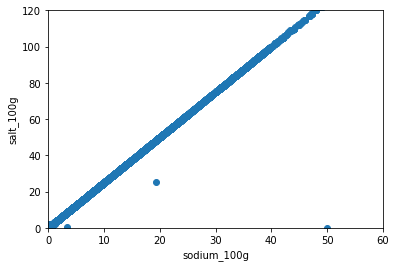

In [28]:
plt.plot(df_clean['sodium_100g'], df_clean["salt_100g"],'o')
plt.xlabel("sodium_100g")
plt.ylabel("salt_100g")
plt.ylim((0,120))
plt.xlim((0,60))
plt.show()

In [29]:
# On peut effectivement supprimer le sodium, redondant avec le sel
df_clean = df_clean.drop(['sodium_100g'], axis=1)

### Travail sur les valeurs aberrantes

In [30]:
# On supprime tous les produits ayant des valeurs pour 100g > 100 ou < 0
index3_ = ['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'salt_100g']
for i in index3_:
    df_clean = df_clean.drop(df_clean[(df_clean[i] < 0) | (df_clean[i] >= 100)].index)

In [31]:
df_clean.shape

(1839647, 13)

In [32]:
# On supprime tous les produits ayant des valeurs sugars_100g > carbohydrates_100g et saturated-fat_100g > fat_100g car les premiers sont inclus dans les seconds
df_clean2 = df_clean.drop(df_clean[df_clean['saturated-fat_100g'] > df_clean['fat_100g']].index)         
df_clean2 = df_clean2.drop(df_clean2[df_clean2['sugars_100g'] > df_clean2['carbohydrates_100g']].index)   

In [33]:
df_clean2.shape

(1820257, 13)

In [34]:
# On supprime tous les produits ayant des valeurs d'energy en kcal_100g > 1000 ou < 0
df_clean3 = df_clean2.drop(df_clean2[(df_clean2['energy-kcal_100g'] < 0) | (df_clean2['energy-kcal_100g'] >= 1000)].index)

In [35]:
df_clean3.shape
# Suppression de 205 964 lignes abbérantes

(1775889, 13)

###  Remplacement des NaN produits par la median du pnns_groups_2

In [37]:
df_clean3_cols = df_clean3.loc[:,['energy-kcal_100g','fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'salt_100g']]
for cols in df_clean3_cols:
        df_clean3[cols].fillna(df_clean3.groupby('pnns_groups_2')[cols].transform('median'), inplace=True)

In [38]:
df_cleaned = df_clean3.dropna(axis=0, thresh=11)
df_cleaned

,countries_en,additives_n,ingredients_from_palm_oil_n,nutriscore_score,nutriscore_grade,pnns_groups_2,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g
product_name,,,,,,,,,,,,,
L.casei,Spain,0.0,0.0,NaN,NaN,unknown,259.0,1.400000,0.9,9.80,9.80,2.7,0.100
moutarde au moût de raisin,France,0.0,0.0,18.0,d,Dressings and sauces,138.0,8.200000,2.2,29.00,22.00,5.1,4.600
Salade de carottes râpées,France,NaN,NaN,1.0,b,One-dish meals,32.0,0.300000,0.1,5.30,3.90,0.9,0.420
Solène céréales poulet,France,5.0,0.0,NaN,NaN,unknown,219.0,5.900000,0.5,30.30,1.70,9.7,0.464
Tarte noix de coco,France,NaN,NaN,14.0,d,Biscuits and cakes,381.0,22.000000,15.5,27.30,21.90,4.6,0.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Riz parfumé,France,NaN,NaN,0.0,b,Cereals,351.0,0.500000,0.0,80.00,0.00,7.0,0.000
little remedies gas relief drops,United States,6.0,0.0,NaN,NaN,unknown,259.0,7.070707,1.7,17.86,3.57,6.1,0.580
Minis beignets,France,NaN,NaN,15.0,d,unknown,333.0,20.200000,6.0,30.90,10.40,7.4,1.100


In [39]:
df_cleaned[df_cleaned.duplicated()]
# Grand nombre de duplicatas: 202 061

,countries_en,additives_n,ingredients_from_palm_oil_n,nutriscore_score,nutriscore_grade,pnns_groups_2,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g
product_name,,,,,,,,,,,,,
Quick Rolled Oats,United States,0.0,0.0,NaN,NaN,unknown,385.0,7.690000,1.92,65.38,3.57,15.38,0.580
Banana Chips Sweetened,United States,0.0,0.0,NaN,NaN,unknown,536.0,28.570000,28.57,64.29,14.29,3.57,0.000
Peanuts,United States,2.0,0.0,NaN,NaN,unknown,464.0,17.860000,0.00,60.71,17.86,17.86,0.635
Veggie Colin the Caterpillar,United Kingdom,4.0,0.0,NaN,NaN,unknown,259.0,7.070707,1.70,17.86,3.57,6.10,0.580
Fairtrade Ground Cinnamon,United Kingdom,0.0,0.0,NaN,NaN,unknown,259.0,7.070707,1.70,17.86,3.57,6.10,0.580
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Sugar Free Drink Mix, Peach Tea",United States,7.0,0.0,NaN,NaN,unknown,500.0,0.000000,1.70,0.00,0.00,0.00,0.000
Pasta lassar,Chile,0.0,0.0,NaN,NaN,unknown,259.0,7.070707,1.70,17.86,3.57,6.10,0.580
Mousse au chocolat noir,France,NaN,NaN,17.0,d,unknown,346.0,27.000000,17.00,19.00,18.00,6.00,0.190


In [40]:
# Suppression des duplicatas
df_cleaned = df_cleaned.drop_duplicates()

In [41]:
# On supprime les lignes qui contiennent un Nutriscore NaN (car c'est notre Target)
df_cleaned = df_cleaned.dropna(subset=['nutriscore_grade'])

<AxesSubplot:ylabel='product_name'>

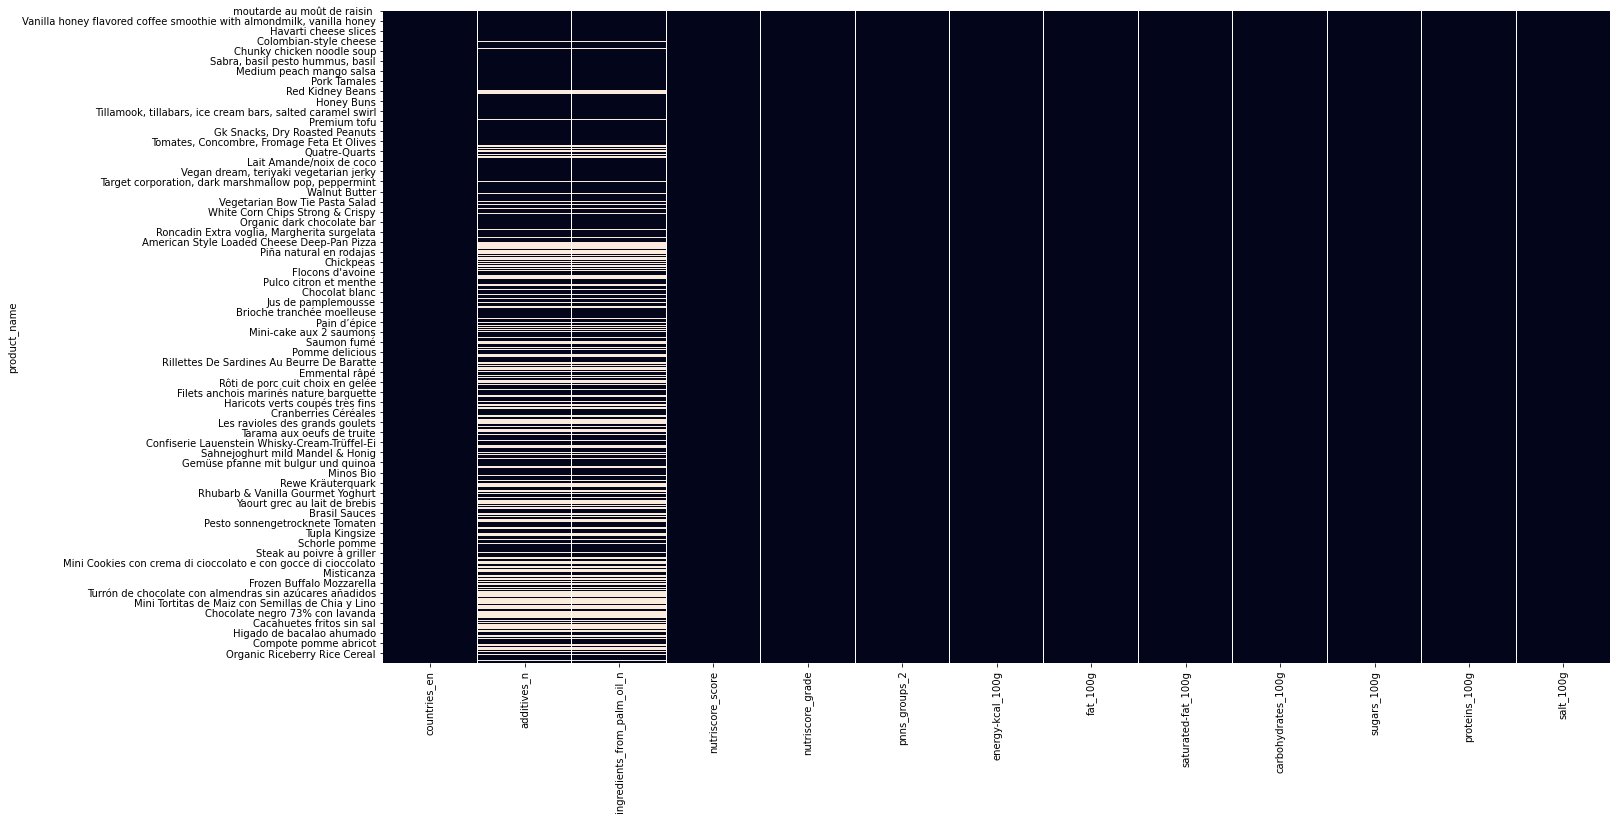

In [42]:
plt.figure(figsize=(22,12))
sns.heatmap(df_cleaned.isna(), cbar=False)

In [43]:
(df_cleaned.isna().mean()).sort_values(ascending=True)

nutriscore_score               0.00000
nutriscore_grade               0.00000
pnns_groups_2                  0.00000
energy-kcal_100g               0.00000
fat_100g                       0.00000
saturated-fat_100g             0.00000
carbohydrates_100g             0.00000
sugars_100g                    0.00000
proteins_100g                  0.00000
salt_100g                      0.00000
countries_en                   0.00109
additives_n                    0.29189
ingredients_from_palm_oil_n    0.29189
dtype: float64

In [44]:
df_cleaned.to_csv(r"C:\Users\Damien\Desktop\Data Scientist\P3\Dataset\en.openfoodfacts.org.products.csv")